In [2]:
# importing all the required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import scipy.stats
import matplotlib.dates as mdates
plt.style.use('bmh')

In [21]:
raw_file = '../data/raw/train.csv'

In [26]:
nyc = pd.read_csv(raw_file, parse_dates=['pickup_datetime', 'dropoff_datetime']) 

In [27]:
nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [28]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [42]:
nyc['trip_duration_hours'] = nyc.trip_duration.apply(lambda x: x/60/60)
nyc['trip_duration_minutes'] = nyc.trip_duration.apply(lambda x: x/60)

In [44]:
nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hours,trip_duration_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.126389,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.184167,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.590000,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.119167,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.120833,7.250000


In [45]:
nyc.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06
trip_duration_hours,1458644.0,0.266526,1.454842,0.000278,0.110278,0.183889,0.298611,9.795228e+02
trip_duration_minutes,1458644.0,15.991538,87.290529,0.016667,6.616667,11.033333,17.916667,5.877137e+04


* From initial EDA it can be seen that the maximum trip duration is around 979 hours which looks like an outlier. 
* The median trip duration is around 11 minutes and 75% of the trips are under 18 minutes.

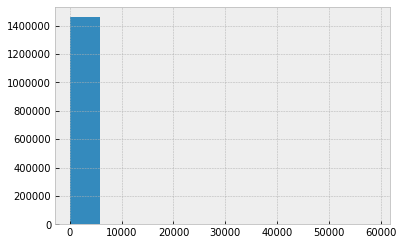

In [47]:
_ = plt.hist(nyc.trip_duration_minutes)

In [60]:
def ecdf(input, xlabel):
    """ Plot the Cumulative distribution of the input variable"""
    x = np.sort(input)
    y = np.arange(1, len(x)+1) / len(x)
    _ = plt.plot(x, y, marker = '.', linestyle = 'none')
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('ECDF')
    plt.margins(0.02)
    plt.xscale('log')

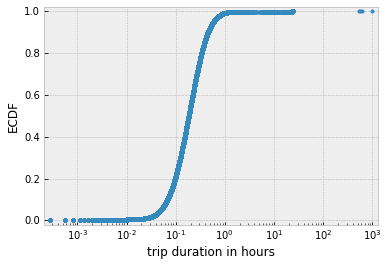

In [64]:
ecdf(nyc.trip_duration_hours, "trip duration in hours")

In [79]:
# let's check and remove points above 1 day i.e. 24 hours
nyc[nyc['trip_duration_hours'] > 24]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hours,trip_duration_minutes
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,538.815556,32328.933333
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,569.327222,34159.633333
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,618.781111,37126.866667
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,979.522778,58771.366667


* Data in the other columns looks normal and it represents only 4 data points out of more than a million trips so we might as well delete these trips. 

In [84]:
# Deleting the trips with duration>24 hours
nyc.drop(nyc[nyc.trip_duration_hours > 24].index, inplace=True)

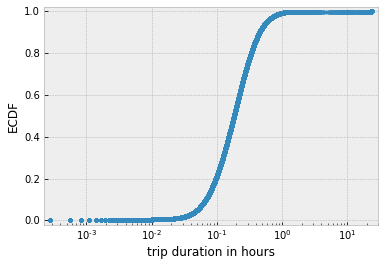

In [96]:
ecdf(nyc['trip_duration_hours'], "trip duration in hours")

In [105]:
# Checking if any of the values in any of the rows or the columns is null
nyc.isnull().any(axis = 1).sum()

0